In [2]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [3]:
unemployment_data = pd.read_csv (r'C:\Users\busco\OneDrive\Documenti\Python Scripts\Repo_tassi_dec\Progetto_Studio\Data\Predittori\Unemployment rate.csv')

In [4]:
unemployment_df=pd.DataFrame(unemployment_data)
unemployment_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,Q,1966-Q3,1.8,NaN
1,AUS,HUR,TOT,PC_LF,Q,1966-Q4,1.7,NaN
2,AUS,HUR,TOT,PC_LF,Q,1967-Q1,1.8,NaN
3,AUS,HUR,TOT,PC_LF,Q,1967-Q2,2.0,NaN
4,AUS,HUR,TOT,PC_LF,Q,1967-Q3,1.9,NaN


Distinct value of Location

In [5]:
unemployment_df["LOCATION"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'SVN', 'OECD', 'G-7',
       'EA19', 'LVA', 'LTU', 'COL', 'EU27_2020', 'CRI'], dtype=object)

We consider just Italy

In [6]:
unemployment_df=unemployment_df[unemployment_df["LOCATION"]=="ITA"]

In [7]:
unemployment_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1855,ITA,HUR,TOT,PC_LF,Q,1983-Q1,7.066667,P
1856,ITA,HUR,TOT,PC_LF,Q,1983-Q2,7.266667,P
1857,ITA,HUR,TOT,PC_LF,Q,1983-Q3,7.433333,P
1858,ITA,HUR,TOT,PC_LF,Q,1983-Q4,7.700000,P
1859,ITA,HUR,TOT,PC_LF,Q,1984-Q1,7.866667,P


Computation of the unemployment rate

In [8]:
unemployment_df["QUARTER"]=unemployment_df["TIME"].str.strip().str[6]

In [9]:
unemployment_df=unemployment_df.sort_values(['TIME'])
unemployment_df['Previous Value'] = unemployment_df.sort_values('TIME').groupby('QUARTER')['Value'].shift(1)
unemployment_df[unemployment_df["QUARTER"]=="1"].head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,QUARTER,Previous Value
1855,ITA,HUR,TOT,PC_LF,Q,1983-Q1,7.066667,P,1,NaN
1859,ITA,HUR,TOT,PC_LF,Q,1984-Q1,7.866667,P,1,7.066667
1863,ITA,HUR,TOT,PC_LF,Q,1985-Q1,8.000000,P,1,7.866667
1867,ITA,HUR,TOT,PC_LF,Q,1986-Q1,8.566667,P,1,8.000000
1871,ITA,HUR,TOT,PC_LF,Q,1987-Q1,9.266666,P,1,8.566667


In [10]:
unemployment_df["UR"]=unemployment_df["Value"]/unemployment_df["Previous Value"]
unemployment_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,QUARTER,Previous Value,UR
1855,ITA,HUR,TOT,PC_LF,Q,1983-Q1,7.066667,P,1,NaN,NaN
1856,ITA,HUR,TOT,PC_LF,Q,1983-Q2,7.266667,P,2,NaN,NaN
1857,ITA,HUR,TOT,PC_LF,Q,1983-Q3,7.433333,P,3,NaN,NaN
1858,ITA,HUR,TOT,PC_LF,Q,1983-Q4,7.700000,P,4,NaN,NaN
1859,ITA,HUR,TOT,PC_LF,Q,1984-Q1,7.866667,P,1,7.066667,1.113208


In [11]:
unemployment_df=unemployment_df.sort_values(['TIME'])
unemployment_df['Previous UR'] = unemployment_df.sort_values('TIME').groupby('QUARTER')['UR'].shift(1)
unemployment_df[unemployment_df["QUARTER"]=="1"].head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,QUARTER,Previous Value,UR,Previous UR
1855,ITA,HUR,TOT,PC_LF,Q,1983-Q1,7.066667,P,1,NaN,NaN,NaN
1859,ITA,HUR,TOT,PC_LF,Q,1984-Q1,7.866667,P,1,7.066667,1.113208,NaN
1863,ITA,HUR,TOT,PC_LF,Q,1985-Q1,8.000000,P,1,7.866667,1.016949,1.113208
1867,ITA,HUR,TOT,PC_LF,Q,1986-Q1,8.566667,P,1,8.000000,1.070833,1.016949
1871,ITA,HUR,TOT,PC_LF,Q,1987-Q1,9.266666,P,1,8.566667,1.081712,1.070833


In [12]:
unemployment_df["UR_log"]=np.log(unemployment_df["UR"])
unemployment_df["UR_log_dif"]=np.log(unemployment_df["UR"])-np.log(unemployment_df["Previous UR"])

In [13]:
unemployment_df[unemployment_df["QUARTER"]=="1"]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,QUARTER,Previous Value,UR,Previous UR,UR_log,UR_log_dif
1855,ITA,HUR,TOT,PC_LF,Q,1983-Q1,7.066667,P,1,NaN,NaN,NaN,NaN,NaN
1859,ITA,HUR,TOT,PC_LF,Q,1984-Q1,7.866667,P,1,7.066667,1.113208,NaN,0.107246,NaN
1863,ITA,HUR,TOT,PC_LF,Q,1985-Q1,8.000000,P,1,7.866667,1.016949,1.113208,0.016807,-0.090438
1867,ITA,HUR,TOT,PC_LF,Q,1986-Q1,8.566667,P,1,8.000000,1.070833,1.016949,0.068437,0.051630
1871,ITA,HUR,TOT,PC_LF,Q,1987-Q1,9.266666,P,1,8.566667,1.081712,1.070833,0.078545,0.010108
1875,ITA,HUR,TOT,PC_LF,Q,1988-Q1,9.700000,P,1,9.266666,1.046763,1.081712,0.045702,-0.032843
1879,ITA,HUR,TOT,PC_LF,Q,1989-Q1,9.800000,P,1,9.700000,1.010309,1.046763,0.010257,-0.035446
1883,ITA,HUR,TOT,PC_LF,Q,1990-Q1,9.000000,P,1,9.800000,0.918367,1.010309,-0.085158,-0.095414
1887,ITA,HUR,TOT,PC_LF,Q,1991-Q1,8.633333,P,1,9.000000,0.959259,0.918367,-0.041594,0.043564
1891,ITA,HUR,TOT,PC_LF,Q,1992-Q1,8.666667,NaN,1,8.633333,1.003861,0.959259,0.003854,0.045448


In [13]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

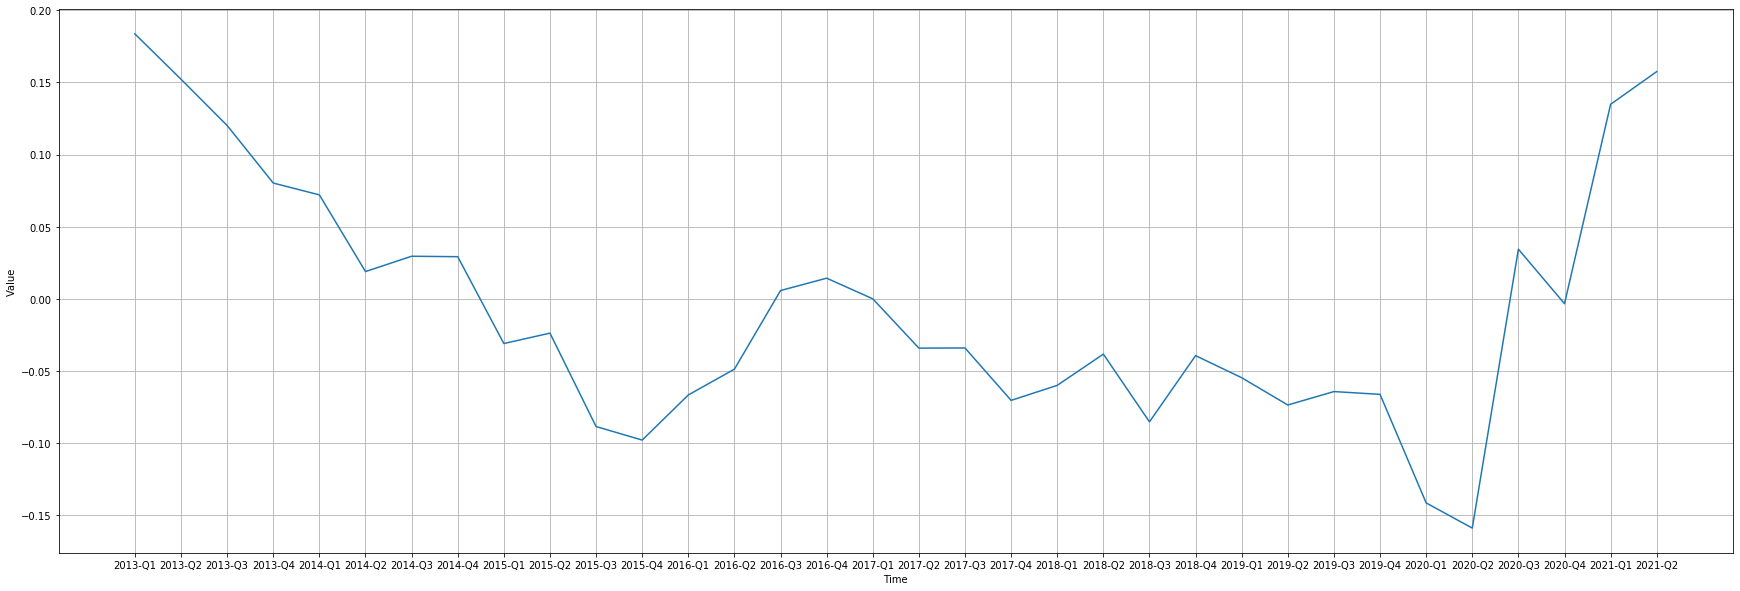

In [20]:
#plot 
plt.figure(figsize=(30, 10))
plot_series(unemployment_df["TIME"], unemployment_df["UR"],start=120)

In [21]:
#unemployment_df=unemployment_df[unemployment_df["UR"]>0]
print(unemployment_df)

     LOCATION INDICATOR SUBJECT MEASURE FREQUENCY     TIME      Value  \
1859      ITA       HUR     TOT   PC_LF         Q  1984-Q1   7.866667   
1860      ITA       HUR     TOT   PC_LF         Q  1984-Q2   7.833333   
1861      ITA       HUR     TOT   PC_LF         Q  1984-Q3   7.800000   
1862      ITA       HUR     TOT   PC_LF         Q  1984-Q4   7.833333   
1863      ITA       HUR     TOT   PC_LF         Q  1985-Q1   8.000000   
...       ...       ...     ...     ...       ...      ...        ...   
1989      ITA       HUR     TOT   PC_LF         Q  2016-Q3  11.733330   
1990      ITA       HUR     TOT   PC_LF         Q  2016-Q4  11.833330   
2005      ITA       HUR     TOT   PC_LF         Q  2020-Q3  10.033330   
2007      ITA       HUR     TOT   PC_LF         Q  2021-Q1  10.100000   
2008      ITA       HUR     TOT   PC_LF         Q  2021-Q2   9.800000   

     Flag Codes QUARTER  Previous UR        UR  
1859          P       1     7.066667  0.113208  
1860          P       2  

we transform the series in log

In [24]:
unemployment_df["UR_log"]=np.log(unemployment_df["UR"])

C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


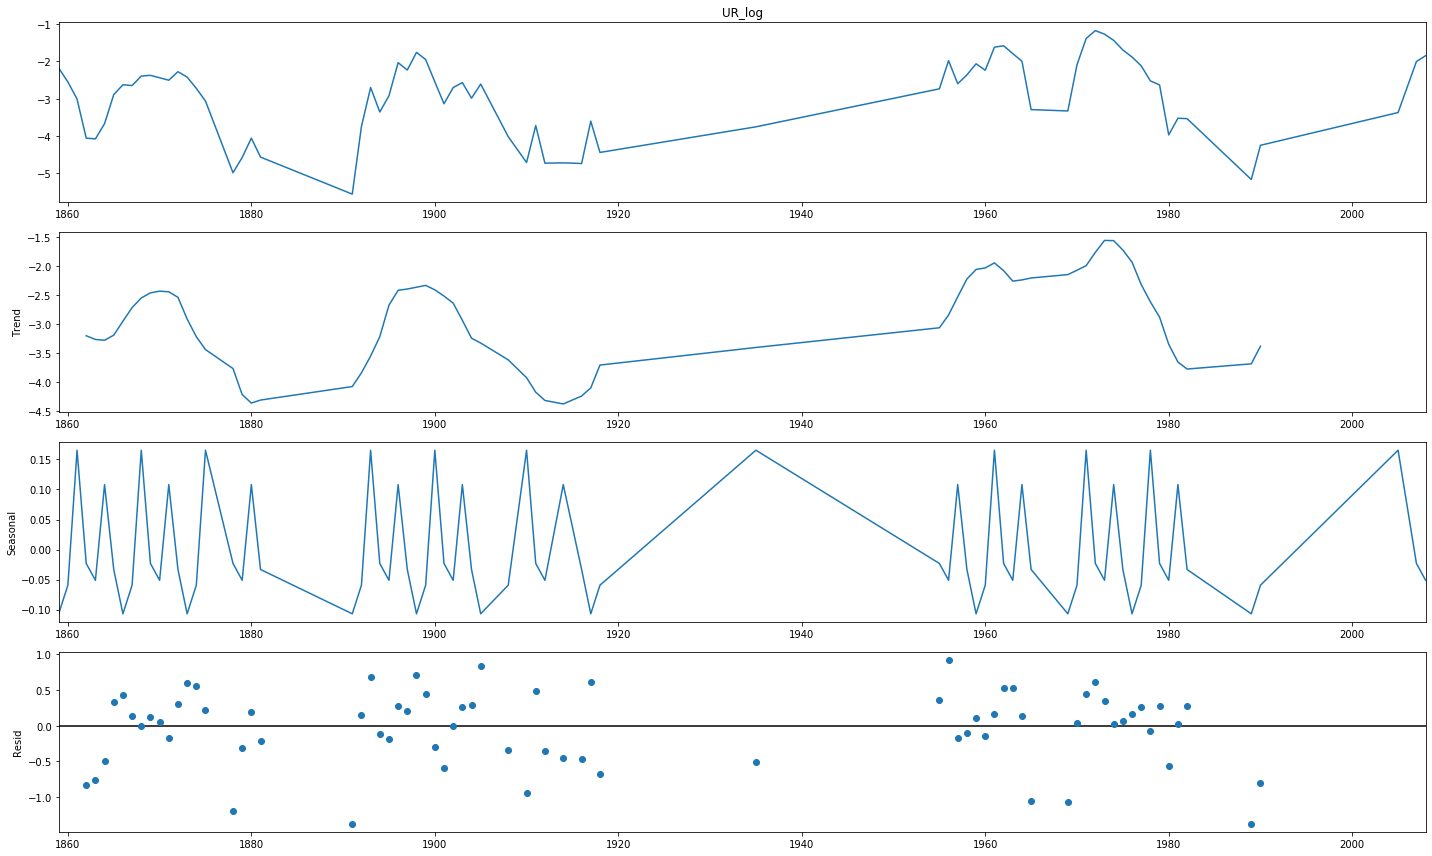

In [25]:
rcParams['figure.figsize'] = 20, 12
decomposition = sm.tsa.seasonal_decompose(unemployment_df["UR_log"], model='additive', filt=None, two_sided=True, freq=7) # freq=1
fig = decomposition.plot()
plt.show()

In [26]:
X = unemployment_df["UR_log"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.028851
p-value: 0.032287
Critical Values:
	1%: -3.522
	5%: -2.901
	10%: -2.588
